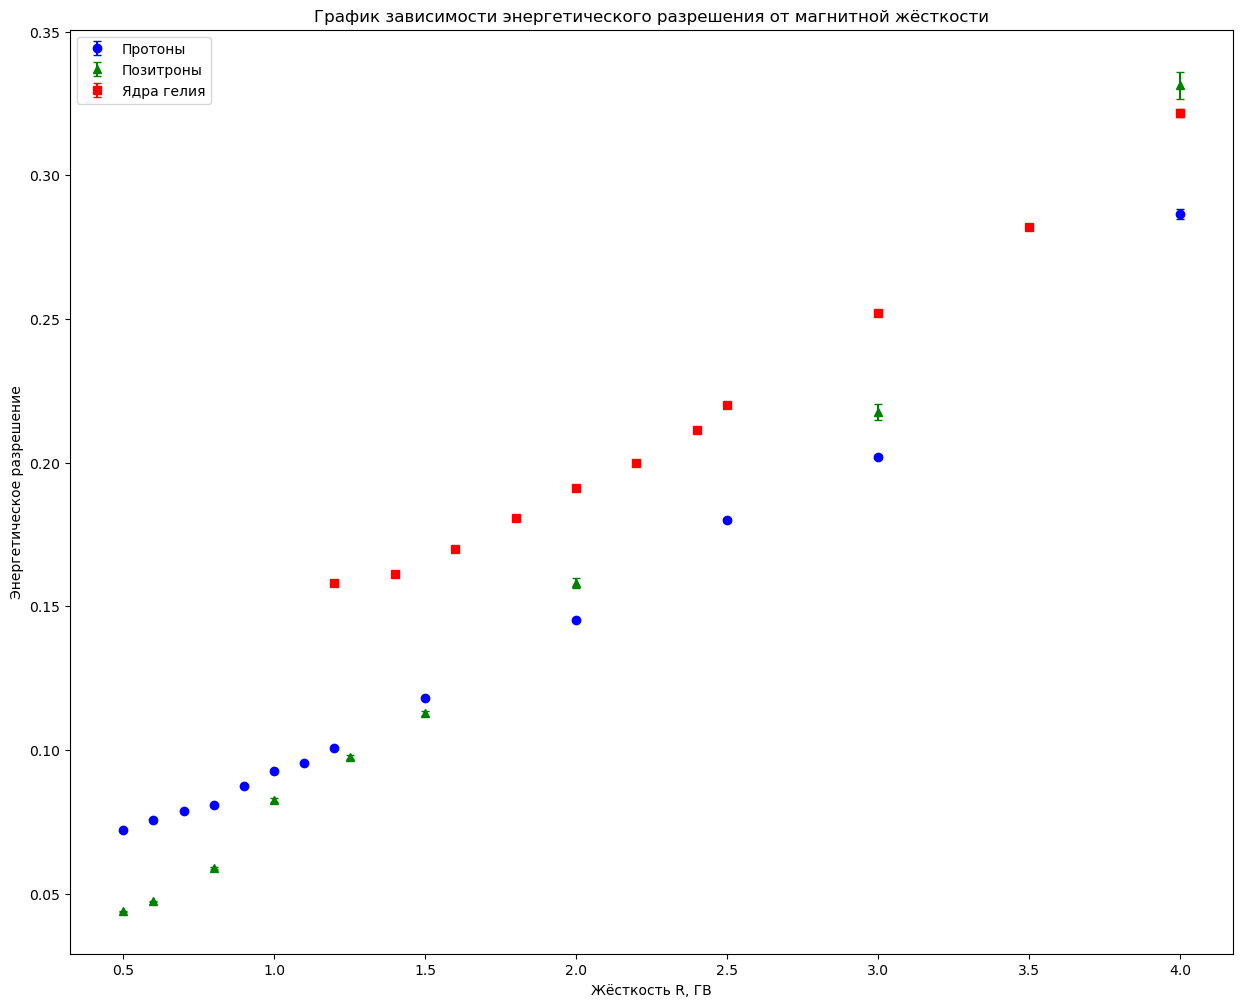

In [17]:
import matplotlib.pyplot as plt
x1 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0]
y1 = [0.01 * i for i in [7.2145, 7.55525, 7.8819, 8.0699, 8.7467, 9.2637, 9.55745, 10.0627, 11.80405, 14.523, 18.001, 20.21, 28.6465]]
y1err = [0.01 * i for i in [0.01175, 0.0094, 0.0094, 0.02115, 0.01175, 0.0094, 0.0094, 0.01175, 0.0141, 0.0329, 0.0705, 0.0705, 0.1645]]
x2 = [0.50, 0.60, 0.80, 1.00, 1.25, 1.50, 2.00, 3.00, 4.00]
y2 = [0.01 * i for i in [4.39215, 4.7376, 5.8985, 8.2485, 9.7525, 11.28, 15.8155, 21.761, 33.135]]
y2err = [0.01 * i for i in [0.0188, 0.02115, 0.047, 0.0705, 0.0705, 0.094, 0.1645, 0.282, 0.47]]
x3 = [1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.5, 3.0, 3.5, 4.0]
y3 = [0.01 * i for i in [15.8155, 16.121, 16.9905, 18.0715, 19.129, 19.975, 21.1265, 22.0195, 25.192, 28.2, 32.1715]]
y3err = [0.01 * i for i in [0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.047, 0.094, 0.094, 0.141]]
plt.figure(figsize=(15, 12))
plt.errorbar(x1, y1, yerr=y1err, fmt='bo', capsize=3, label='Протоны')
plt.errorbar(x2, y2, yerr=y2err, fmt='g^', capsize=3, label='Позитроны')
plt.errorbar(x3, y3, yerr=y3err, fmt='rs', capsize=3, label='Ядра гелия')
plt.xlabel('Жёсткость R, ГВ')
plt.ylabel('Энергетическое разрешение')
plt.title('График зависимости энергетического разрешения от магнитной жёсткости')
plt.legend()
plt.savefig('Гр1разрешение_жесткость.png', dpi=300, bbox_inches='tight')
plt.show()


In [22]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Позитроны!!!
R = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0, 7.5, 10, 15])
sigma = np.array([7.2145, 7.55525, 7.8819, 8.0699, 8.7467, 9.2637, 9.55745, 10.0627, 
                  11.80405, 14.523, 18.001, 20.21, 28.6465, 52.875, 73.555, 113.27])
sigma_err = np.array([0.01175, 0.0094, 0.0094, 0.02115, 0.01175, 0.0094, 0.0094, 
                      0.01175, 0.0141, 0.0329, 0.0705, 0.0705, 0.1645, 0.705, 1.175, 3.055])
# Линейная модель
def linear_model(x, a, b):
    return a * x + b
popt, pcov = curve_fit(linear_model, R, sigma, sigma=sigma_err, absolute_sigma=True)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
print(f"Линейная модель: σ(R) = ({a:.3f} ± {a_err:.3f})·R + ({b:.3f} ± {b_err:.3f})")

relative_errors = sigma_err / sigma
print(f"\nОтносительные погрешности измерений:")
for i, r in enumerate(R):
    print(f"R = {r:.1f} ГэВ/с: δσ/σ = {relative_errors[i]:.3f} ({relative_errors[i]*100:.1f}%)")
# Предположим линейный рост относительной погрешности
popt_err, pcov_err = curve_fit(linear_model, R, relative_errors)
a_err, b_err = popt_err
print(f"\nЗависимость относительной погрешности: δσ/σ = ({a_err:.4f} ± {np.sqrt(pcov_err[0,0]):.4f})·R + ({b_err:.4f} ± {np.sqrt(pcov_err[1,1]):.4f})")
R_max = (1 - b_err) / a_err
print(f"\nРЕЗУЛЬТАТ:")
print(f"Максимальная измеряемая жесткость R_max = {R_max:.1f} ГэВ/с")
print(f"(при условии относительной погрешности 100%)")

Линейная модель: σ(R) = (4.825 ± 0.011)·R + (4.486 ± 0.011)

Относительные погрешности измерений:
R = 0.5 ГэВ/с: δσ/σ = 0.002 (0.2%)
R = 0.6 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 0.7 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 0.8 ГэВ/с: δσ/σ = 0.003 (0.3%)
R = 0.9 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 1.0 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 1.1 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 1.2 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 1.5 ГэВ/с: δσ/σ = 0.001 (0.1%)
R = 2.0 ГэВ/с: δσ/σ = 0.002 (0.2%)
R = 2.5 ГэВ/с: δσ/σ = 0.004 (0.4%)
R = 3.0 ГэВ/с: δσ/σ = 0.003 (0.3%)
R = 4.0 ГэВ/с: δσ/σ = 0.006 (0.6%)
R = 7.5 ГэВ/с: δσ/σ = 0.013 (1.3%)
R = 10.0 ГэВ/с: δσ/σ = 0.016 (1.6%)
R = 15.0 ГэВ/с: δσ/σ = 0.027 (2.7%)

Зависимость относительной погрешности: δσ/σ = (0.0018 ± 0.0001)·R + (-0.0005 ± 0.0003)

РЕЗУЛЬТАТ:
Максимальная измеряемая жесткость R_max = 567.0 ГэВ/с
(при условии относительной погрешности 100%)


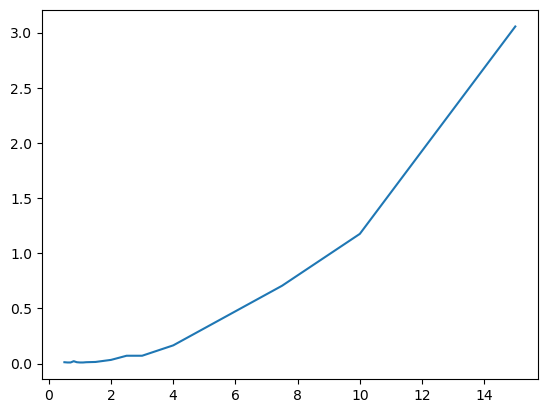

In [23]:
# Погрешности распределены не очень линейно!!! Но в задании указана линейная аппроксимация, хотя можно поиграться с ней 
x1 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0, 7.5, 10, 15]
y1err = [0.01175, 0.0094, 0.0094, 0.02115, 0.01175, 0.0094, 0.0094, 0.01175, 0.0141, 0.0329, 0.0705, 0.0705, 0.1645, 0.705, 1.175, 3.055]
plt.plot(x1, y1err)
plt.show()

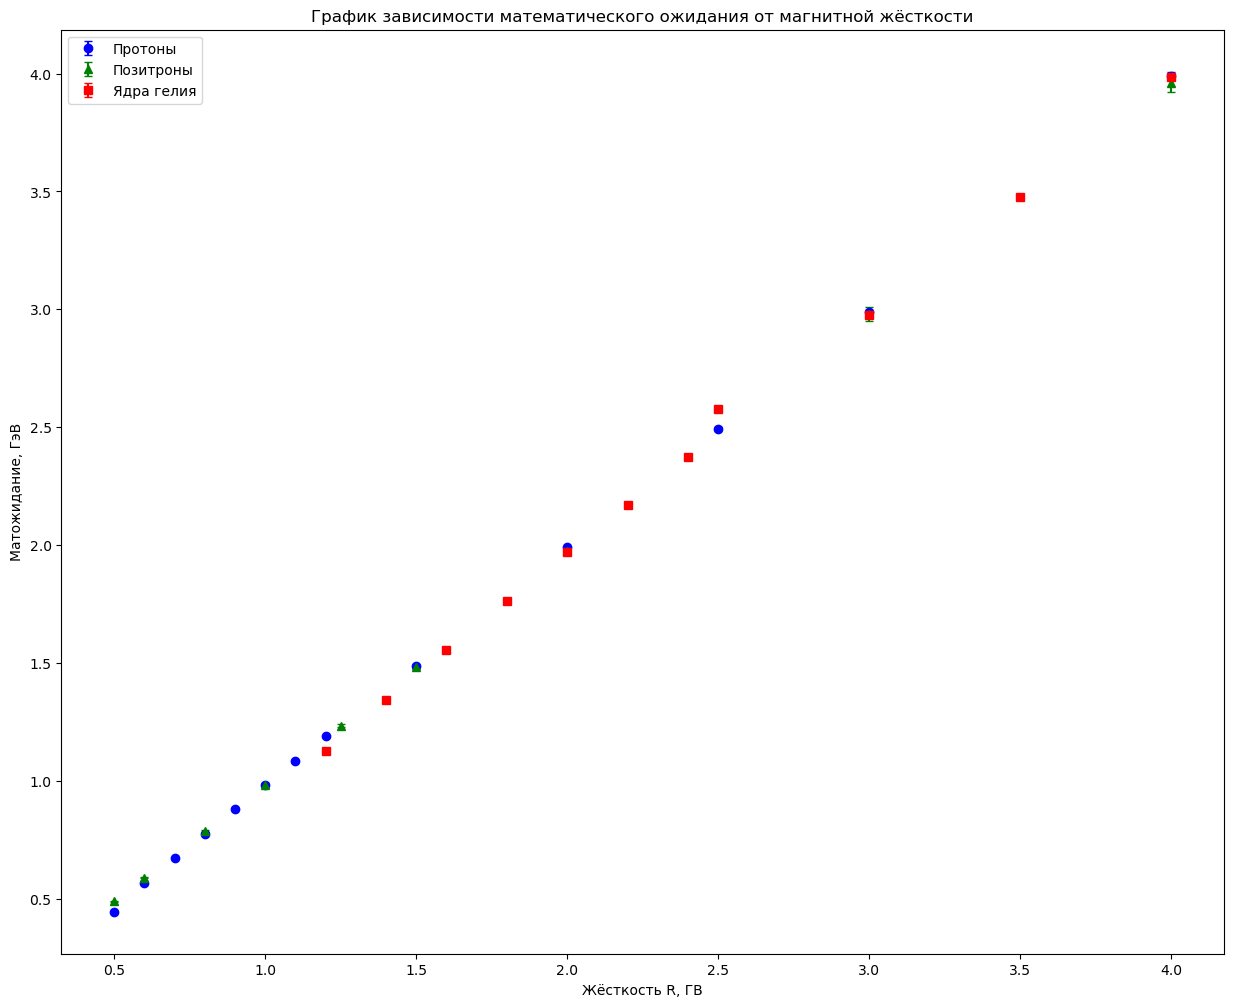

In [16]:
import matplotlib.pyplot as plt
x1 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0]
y1 = [0.1 * i for i in [4.452, 5.646, 6.732, 7.763, 8.821, 9.840, 10.856, 11.882, 14.884, 19.91, 24.94, 29.90, 39.91]]
y1err = [0.1 * i for i in [0.005, 0.005, 0.006, 0.014, 0.008, 0.008, 0.007, 0.009, 0.012, 0.03, 0.06, 0.07, 0.17]]
x2 = [0.50, 0.60, 0.80, 1.00, 1.25, 1.50, 2.00, 3.00, 4.00]
y2 = [0.1 * i for i in [4.884, 5.894, 7.87, 9.83, 12.33, 14.83, 19.73, 29.8, 39.6]]
y2err = [0.1 * i for i in [0.015, 0.018, 0.04, 0.06, 0.06, 0.08, 0.14, 0.3, 0.4]]
x3 = [1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.5, 3.0, 3.5, 4.0]
y3 = [0.1 * i for i in [11.28, 13.44, 15.56, 17.62, 19.70, 21.72, 23.74, 25.77, 29.76, 34.76, 39.84]]
y3err = [0.1 * i for i in [0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.05, 0.07, 0.09, 0.11]]
plt.figure(figsize=(15, 12))
plt.errorbar(x1, y1, yerr=y1err, fmt='bo', capsize=3, label='Протоны')
plt.errorbar(x2, y2, yerr=y2err, fmt='g^', capsize=3, label='Позитроны')
plt.errorbar(x3, y3, yerr=y3err, fmt='rs', capsize=3, label='Ядра гелия')
plt.xlabel('Жёсткость R, ГВ')
plt.ylabel('Матожидание, ГэВ')
plt.title('График зависимости математического ожидания от магнитной жёсткости')
plt.legend()
plt.savefig('Гр2матожидание_жесткость.png', dpi=300, bbox_inches='tight')
plt.show()


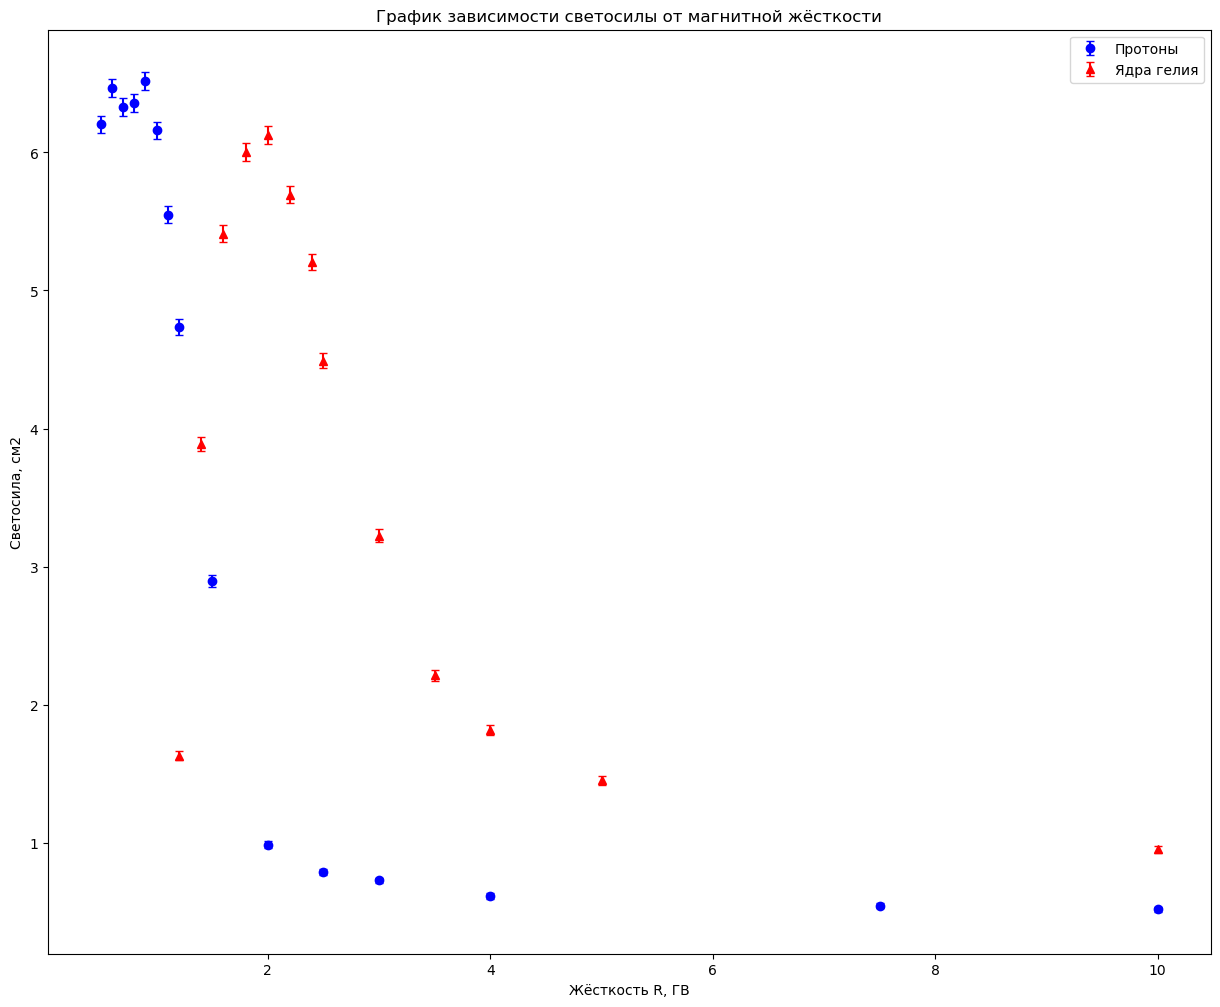

In [1]:
# протоны - [9377/2000000, 9779/2000000, 9570/2000000, 9615/2000000, 9855/2000000, 9311/2000000, 8389/2000000, 7158/2000000, 4374/2000000, 1490/2000000, 1426/2399998, 1319/2399998, 973/2099998, 822/2000000, 860/2200001]
# импульсы [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0, 7.5, 10.0]
# гелия - [2462/2000000, 5875/2000000, 8182/2000000, 9077/2000000, 9261/2000000, 8608/2000000, 7868/2000000, 6788/2000000, 4873/1999999, 3343/1999999, 2748/1999999, 2195/1999999, 1438/1999999]
# импульсы [1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.5, 3.0, 3.5, 4.0, 5.0, 10.0]
import math 
import matplotlib.pyplot as plt

s = 3600 
sin_theta_squared = math.sin(math.pi / 180 * 20) ** 2
list_n1 = [9377, 9779, 9570, 9615, 9855, 9311, 8389, 7158, 4374, 1490, 1426, 1319, 973, 822, 860]
list_n01 = [2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2399998, 2399998, 2099998, 2000000, 2200001]
luminosity1 = []
list_n2 = [2462, 5875, 8182, 9077, 9261, 8608, 7868, 6788, 4873, 3343, 2748, 2195, 1438]
list_n02 = [2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 1999999, 1999999, 1999999, 1999999, 1999999]
luminosity2 = []

for i in range(len(list_n1)): 
    luminosity1.append(math.pi * s * sin_theta_squared * list_n1[i] / list_n01[i]) 
for i in range(len(list_n2)):
    luminosity2.append(math.pi * s * sin_theta_squared * list_n2[i] / list_n02[i])

x1 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0, 7.5, 10.0]
x2 = [1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.5, 3.0, 3.5, 4.0, 5.0, 10.0]
lum_err1 = []
lum_err2 = []
for i in range(len(list_n1)):
    lum_err1.append(luminosity1[i] / list_n1[i]**0.5)
for i in range(len(list_n2)):
    lum_err2.append(luminosity2[i] / list_n2[i]**0.5)

plt.figure(figsize=(15, 12))
plt.errorbar(x1, luminosity1, yerr=lum_err1, fmt='bo', capsize=3, label='Протоны')
plt.errorbar(x2, luminosity2, yerr=lum_err2, fmt='r^', capsize=3, label='Ядра гелия')
plt.xlabel('Жёсткость R, ГВ')
plt.ylabel('Светосила, см2')
plt.title('График зависимости светосилы от магнитной жёсткости')
plt.legend()
plt.savefig('Гр3светосила_жесткость.png', dpi=300, bbox_inches='tight')
plt.show()